In [14]:
import pandas as pd
import numpy as np
import graphviz
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
adult_tr = pd.read_csv(r'C:\Users\jacob\Downloads\DSPR_Data_Sets\Website Data Sets\adult_ch6_training')
y= adult_tr[['Income']]

In [15]:
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames = True)

In [16]:
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)
mar_cat_dict

{0: 'Divorced', 1: 'Married', 2: 'Never-married', 3: 'Separated', 4: 'Widowed'}

In [17]:
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-married", "Separated", "Widowed"]
y_names = ["<=50k", ">50k"]

In [18]:
c50_01 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=5).fit(X,y)

In [19]:
export_graphviz(c50_01, out_file = "c50_01.dot", 
                feature_names=X_names, class_names = y_names)

In [20]:
#c50_01.predict(X)
predIncomeC5001 = c50_01.predict(X)

In [21]:
graphviz.render('dot', 'png', 'c50_01.dot')

'c50_01.dot.png'

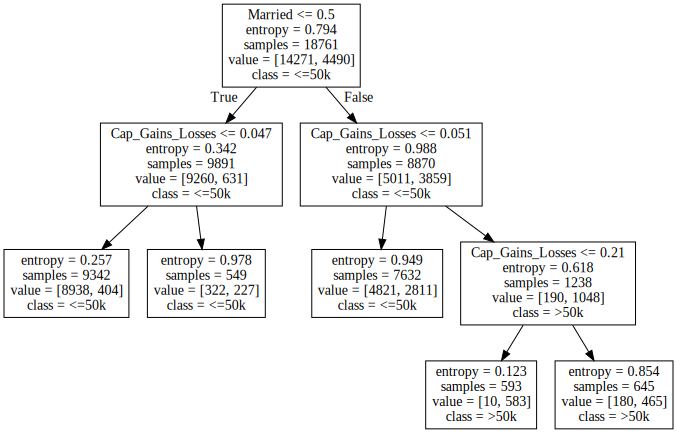

In [22]:
graphviz.Source.from_file('c50_01.dot')

Similar to the CART model, the decision begins by considering whether "married" is true or false. For those records that married is true, it looks at whether CGL is <= 0.047. If that condition is true, it predicts 